# Introduction to Pandas

In [2]:
import numpy as np
import pandas as pd

Pandas objects can be thought of as enhanced versions of NumPy structured arrays in which the rows and columns are identified with labels rather than simple integer indices.

In Pandas, we have two main data structures that we can explore. The first is a _DataFrame_ and the second is a _Series_ . 

A **DataFrame** is a two-dimensional array of values with both a row and a column index.

A **Series** is a one-dimensional array of values with an index.

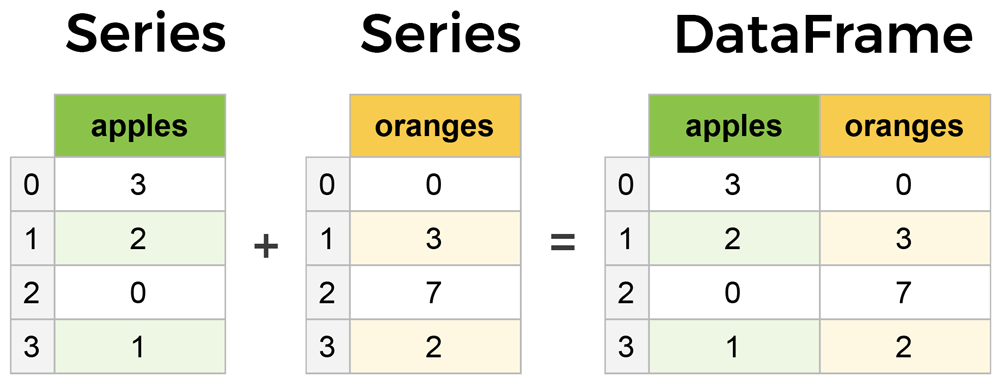

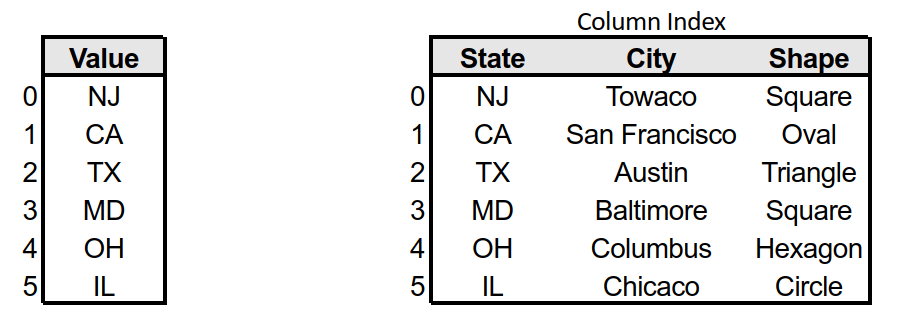

## Pandas Series

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

The Series includes a sequence of values and a sequence of indices, which we can access with the values and index attributes. The values are simply a familiar NumPy array and the index is an array-like object of type pd. Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation.

While the Numpy Array has an _implicitly defined_ integer index used to access the values, the Pandas Series has an _explicitly defined_ index associated with the values.

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
data[1]

The _explicit index_ definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example:

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
data['b']

0.5

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [ ]:
data[3]

Pandas Series can be seen as a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure which maps typed keys to a set of typed values. 

This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.

The Series-as-dictionary analogy can be made even more clear by constructing a Series object directly from a Python dictionary:

In [11]:
population_d = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population_s = pd.Series(population_d)
population_s

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [ ]:
population_s['California']

Unlike a dictionary, though, the Series also supports array-style operations such as slicing:

In [ ]:
population_s['California':'Florida']

In [ ]:
data=pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])
data

In this case, the Series is populated only with the explicitly identified keys.

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0, 0.99],
                 index=['a', 'b', 'c', 'd', 'e'])
data

In [ ]:
'f' in data

In [ ]:
data[(data > 0.3) & (data < 0.8)]

In [ ]:
data[0:2]

In [ ]:
# fancy indexing
data[['a', 'e']]

Notice that when slicing with an explicit index (i.e., `data['a':'c']`), the final index is included in the slice, while when slicing with an implicit index (i.e., `data[0:2]`), the final index is excluded from the slice.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

In [ ]:
data[1]

In [ ]:
data[1:3]

**Remark.** If the Series has an explicit integer index, an indexing operation such as `data[1]` will use the explicit indices, while a slicing operation like `data[1:3]` will use the implicit Python-style index.

Because of this potential confusion in the case of integer indexes, Pandas provides some special indexer attributes that explicitly expose certain indexing schemes. These are not functional methods, but attributes that expose a particular slicing interface to the data in the Series.

First, the `loc` attribute allows indexing and slicing that always references the _explicit index_ :

In [ ]:
data.loc[1]

In [ ]:
data.loc[1:3]

The `iloc` attribute allows indexing and slicing that always references the implicit Python-style index:

In [ ]:
data.iloc[1]

In [ ]:
data.iloc[1:3]

## Pandas Dataframe

Like the Series object, the DataFrame can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary.

A DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.

In [9]:
area_d = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area_s = pd.Series(area_d)
area_s

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [12]:
states = pd.DataFrame({'population': population_s,
                       'area': area_s})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
states.index

In [ ]:
states.columns

A DataFrame can be seen as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:

In [13]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Notice the potential point of confusion here: in a two-dimesnional NumPy array, `data[0]` will return the first row. For a DataFrame, `data['col0']` will return the first column.

Now we are going to see different ways to build a dataframe.

In [ ]:
# Dataframe from a single Series
pd.DataFrame(population_s, columns=['population'])

In [ ]:
#Any list of dictionaries can be made into a DataFrame
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

In [ ]:
# Missing keys are filled-in with NaN
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

In [ ]:
#DataFrame can be constructed from a dictionary of Series objects 
pd.DataFrame({'population': population_s,
              'area': area_s})

In [ ]:
#From a two-dimensional NumPy array
pd.DataFrame(np.random.rand(3, 2),
             columns=['high', 'low'],
             index=['a', 'b', 'c'])

In [14]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
data.area # the previous syntax is better!

In [ ]:
data.area is data['area'] 

In [15]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

In [ ]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [ ]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [ ]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
data.ix[:3, :'pop']

In [ ]:
data.loc[data.density > 100, ['pop', 'density']]

In [ ]:
data.iloc[0, 2] = 90
data

In [ ]:
ser = pd.Series(np.random.randint(0, 10, 4))
ser

In [ ]:
df = pd.DataFrame(np.random.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

If we apply a NumPy function on either of these objects, the result will be another Pandas object with the indices preserved:

In [ ]:
np.exp(ser)

In [ ]:
np.sin(df * np.pi / 4)

In [16]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [17]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [ ]:
area.index | population.index

Any item for which one or the other does not have an entry is marked with `NaN`, or "Not a Number," which is how Pandas marks missing data (see further discussion of missing data in Handling Missing Data). This index matching is implemented this way for any of Python's built-in arithmetic expressions; any missing values are filled in with NaN by default:

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

If using `NaN` values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators. For example, calling `A.add(B)` is equivalent to calling A + B, but allows optional explicit specification of the fill value for any elements in A or B that might be missing:

In [ ]:
A.add(B, fill_value=-99)

In [ ]:
A = pd.DataFrame(np.random.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

In [ ]:
B = pd.DataFrame(np.random.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

In [ ]:
A + B

As was the case with Series, we can use the associated object's arithmetic method and pass any desired fill_value to be used in place of missing entries. Here we'll fill with the mean of all values in A (computed by first stacking the rows of A):

In [ ]:
fill = A.stack().mean()
print(A.stack())
print(fill)
A.add(B, fill_value=fill)

The following table lists Python operators and their equivalent Pandas object methods:

| Python operators | Pandas methods |
| --- | --- |
| + | add() |
| - | sub(), subtract() |
| * | mul(), multiply() |
| / | truediv(), div(), divide() |
| // | floordiv() |
| & | mod() |
| ** | pow() |

When performing operations between a DataFrame and a Series, the index and column alignment is similarly maintained. 

Operations between a DataFrame and a Series are similar to operations between a two-dimensional and one-dimensional NumPy array. 

Consider one common operation, where we find the difference of a two-dimensional array and one of its rows:

In [ ]:
A = np.random.randint(10, size=(3, 4))
A

In [ ]:
A - A[0]

In [ ]:
df = pd.DataFrame(A, columns=list('QRST'))
df

In [ ]:
df.iloc[0]

In [ ]:
df - df.iloc[0]

In [ ]:
df.subtract(df['R'], axis=0)

In [ ]:
halfrow = df.iloc[0, ::2]
halfrow

In [ ]:
df - halfrow

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])
data

In [ ]:
data.isnull()

In [ ]:
data[data.notnull()]

In [ ]:
data.dropna()

In [18]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


We cannot drop single values from a DataFrame; we can only drop full rows or full columns. Depending on the application, you might want one or the other, so dropna() gives a number of options for a DataFrame.

By default, dropna() will drop all rows in which any null value is present:

In [19]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [20]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


But this drops some good data as well; you might rather be interested in dropping rows or columns with all NA values, or a majority of NA values. This can be specified through the how or thresh parameters, which allow fine control of the number of nulls to allow through.

The default is how='any', such that any row or column (depending on the axis keyword) containing a null value will be dropped. You can also specify how='all', which will only drop rows/columns that are all null values:

In [ ]:
df[3] = np.nan
df

In [ ]:
df.dropna(axis='columns', how='all')

For finer-grained control, the thresh parameter lets you specify a minimum number of non-null values for the row/column to be kept:

In [22]:
df.dropna(axis='rows', thresh=1)

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [24]:
df.fillna(-99)

,0,1,2
0,1.0,-99.0,2
1,2.0,3.0,5
2,-99.0,4.0,6


In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

In [23]:
data.fillna(-99)

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [ ]:
# forward-fill
data.fillna(method='ffill')

In [ ]:
# back-fill
data.fillna(method='bfill')

In [ ]:
df

In [ ]:
df.fillna(method='ffill', axis=1)

## Pandas Index object

Both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. This Index object is an interesting structure in itself, and it can be thought of either as an immutable array. This view has some interesting consequences in the operations available on Index objects. As a simple example, let's construct an Index from a list of integers:

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

In [ ]:
ind[1]

In [ ]:
ind[::2]

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

In [ ]:
ind[1] = 0

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic. The Index object follows many of the conventions used by Python's built-in set data structure, so that unions, intersections, differences, and other combinations can be computed in a familiar way:

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [ ]:
indA & indB  # intersection

In [ ]:
indA | indB  # union

In [ ]:
indA ^ indB  # symmetric difference

In [ ]:
indA.intersection(indB)

## Pivot tables

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

In [ ]:
titanic.groupby('sex')[['survived']].mean()

In [ ]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

### Excel and Pandas

It is possible to load your files in Pandas DataFrames with `pd.Excelfile()`:

In [ ]:
import pandas as pd
file = 'example.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

In [ ]:
df1 = xl.parse('Foglio1')
df1

In [ ]:
df2 = xl.parse('Foglio2')
df2

In [ ]:
df = pd.read_csv("random-matrix.csv") 
df

In [ ]:
writer = pd.ExcelWriter('example1.xlsx', engine='xlsxwriter')

In [ ]:
titanic.to_excel(writer, 'Sheet1')

In [ ]:
writer.save()

In [ ]:
titanic.to_csv("example2.csv")